<a href="https://colab.research.google.com/github/ajazturki10/Model-Optimization/blob/main/Model_Optimization_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Define the hyperparameters
learning_rate = 0.01
momentum = 0.9
rho = 0.9
epsilon = 1e-7

In [5]:
# Define the optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
nag = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=rho, epsilon=epsilon)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=learning_rate, epsilon=epsilon)
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=epsilon)

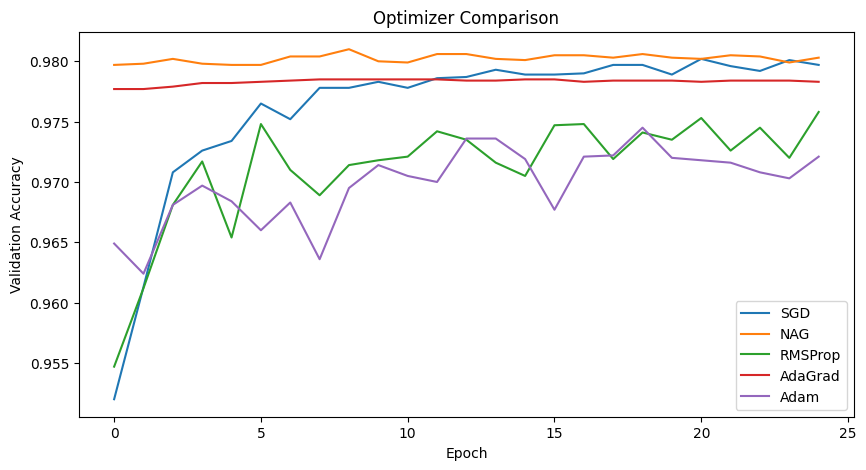

In [6]:
# Compile the model with each optimizer and train
models = [('SGD', sgd), ('NAG', nag), ('RMSProp', rmsprop), ('AdaGrad', adagrad), ('Adam', adam)]
plt.figure(figsize=(10, 5))
for optimizer_name, optimizer in models:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), verbose=0)
    plt.plot(history.history['val_accuracy'], label=optimizer_name)

plt.title('Optimizer Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()